In [66]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

%matplotlib inline
mpl.rc('text', usetex=True)
mpl.rc('font', size=14)
mpl.rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
mpl.rc('text.latex', preamble='\\usepackage[russian]{babel}')

In [32]:
u, v, r = sp.symbols('u v r', nonnegative=True)
g = sp.sqrt(u) * sp.exp(r * (1 - v**2))
g

sqrt(u)*exp(r*(1 - v**2))

In [33]:
Jac = sp.Matrix([[g.diff(u), g.diff(v)], [1, 0]])
Jac

Matrix([
[exp(r*(1 - v**2))/(2*sqrt(u)), -2*r*sqrt(u)*v*exp(r*(1 - v**2))],
[                            1,                                0]])

In [34]:
Jac_st = Jac.subs({u: 1, v: 1})
Jac_st

Matrix([
[1/2, -2*r],
[  1,    0]])

In [35]:
sp.pprint(Jac_st.eigenvals())

⎧      __________       __________       ⎫
⎪1   ╲╱ 1 - 32⋅r      ╲╱ 1 - 32⋅r    1   ⎪
⎨─ - ────────────: 1, ──────────── + ─: 1⎬
⎪4        4                4         4   ⎪
⎩                                        ⎭


In [36]:
g_lam = sp.lambdify((u, v, r), g, 'numpy')

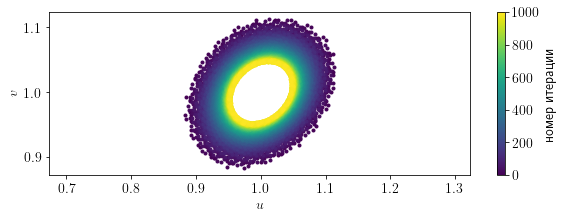

In [80]:
phi = np.arange(0, 1.9 * np.pi, 0.1 * np.pi)
u = 0.1 * np.cos(phi) + 1
v = 0.1 * np.sin(phi) + 1
n_iter = 1000
cmap = plt.get_cmap(lut=n_iter)
fig, ax = plt.subplots(figsize=(9.44882, 3))

for i in range(n_iter):
    ax.plot(u, v, '.', c=cmap.colors[i])
    (u, v) = (g_lam(u, v, 0.5), u)

ax.axis('equal')
ax.set_xlabel(r'$u$')
ax.set_ylabel(r'$v$')
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.Normalize(0, n_iter), cmap), label=r'номер итерации')

In [81]:
fig.savefig('../figures/weak_focus.pdf', bbox_inches='tight')

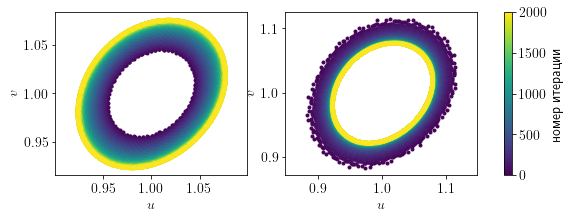

In [93]:
phi = np.arange(0, 1.9 * np.pi, 0.1 * np.pi)
u = 0.05 * np.cos(phi) + 1
v = 0.05 * np.sin(phi) + 1
n_iter = 2000
cmap = plt.get_cmap(lut=n_iter)
fig, axs = plt.subplots(1, 2, figsize=(9.44882, 3))

for i in range(n_iter):
    axs[0].plot(u, v, '.', c=cmap.colors[i])
    (u, v) = (g_lam(u, v, 0.501), u)

u = 0.1 * np.cos(phi) + 1
v = 0.1 * np.sin(phi) + 1
   
for i in range(n_iter):
    axs[1].plot(u, v, '.', c=cmap.colors[i])
    (u, v) = (g_lam(u, v, 0.501), u)
    
axs[0].axis('equal')
axs[0].set_xlabel(r'$u$')
axs[0].set_ylabel(r'$v$')

axs[1].axis('equal')
axs[1].set_xlabel(r'$u$')
axs[1].set_ylabel(r'$v$')

fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.Normalize(0, n_iter), cmap), label=r'номер итерации', ax=axs)
# fig.tight_layout()

In [94]:
fig.savefig('../figures/cycle_after_bifurc.pdf', bbox_inches='tight')